In [1]:
%matplotlib inline
import sys, re
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt
pd.options.display.max_rows = 4000
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from os import path
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter
import unicodedata
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder,TrigramCollocationFinder, TrigramAssocMeasures
from operator import itemgetter
nltk.download('punkt')
from sklearn import preprocessing
pd.options.display.max_rows = 4000

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/visualboardwalk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/visualboardwalk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/visualboardwalk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
survey_data = pd.read_csv(r'/Volumes/GoogleDrive/Shared drives/MediSprout/vishaal/MediSprout-notebooks/NLP Analysis/survey_data.csv')
survey_data

id     source  visit_id  is_satisfied  rating  \
0            1  Clinician     17486             1     NaN   
1            2  Clinician     17488             1     NaN   
2            3    Patient     17488             1     NaN   
3            4    Patient     17490             0     NaN   
4            5  Clinician     17490             0     NaN   
...        ...        ...       ...           ...     ...   
161900  161901  Clinician    269699             1     3.0   
161901  161902    Patient    269711             1     5.0   
161902  161903    Patient    269510             0     5.0   
161903  161904    Patient    267236             1     5.0   
161904  161905    Patient    269704             1     5.0   

                                           feedback  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                             shut down mid session   
...                                             ...   
161900  Poor audio and visual most of the session.    
161901                                          NaN   
161902                                          NaN   
161903                                          NaN   
161904                                          NaN   

        member_healthcare_org_rel_id  patient_id           created_on  \
0                                676       647.0  2019-03-19 17:56:05   
1                                322       389.0  2019-03-20 17:35:56   
2                                322       389.0  2019-03-20 17:35:57   
3                                237        87.0  2019-03-20 18:21:10   
4                                237        87.0  2019-03-20 18:21:38   
...                              ...         ...                  ...   
161900                         67569    108227.0  2020-10-07 23:02:03   
161901                          4179     15992.0  2020-10-07 23:05:31   
161902                         60228     47688.0  2020-10-07 23:19:02   
161903                         65974    190019.0  2020-10-07 23:20:22   
161904                         64657    274896.0  2020-10-07 23:26:45   

                 updated_on  is_mobile          platform client_name  \
0       2019-03-19 17:56:05          0               NaN         NaN   
1       2019-03-20 17:35:56          0               NaN         NaN   
2       2019-03-20 17:35:57          0               NaN         NaN   
3       2019-03-20 18:21:10          0               NaN         NaN   
4       2019-03-20 18:21:38          0               NaN         NaN   
...                     ...        ...               ...         ...   
161900  2020-10-07 23:02:03          1                           NaN   
161901  2020-10-07 23:05:31          1                           NaN   
161902  2020-10-07 23:19:02          0  Mac OS X 10_15_6      Chrome   
161903  2020-10-07 23:20:22          1                           NaN   
161904  2020-10-07 23:26:45          1                           NaN   

       client_version screen_size connection_type  build_version  \
0                 NaN         NaN             NaN            NaN   
1                 NaN         NaN             NaN            NaN   
2                 NaN         NaN             NaN            NaN   
3                 NaN         NaN             NaN            NaN   
4                 NaN         NaN             NaN            NaN   
...               ...         ...             ...            ...   
161900            NaN         NaN             NaN            NaN   
161901            NaN         NaN             NaN            NaN   
161902  85.0.4183.121  1440 x 900             NaN            NaN   
161903            NaN         NaN             NaN            NaN   
161904            NaN         NaN             NaN            NaN   

        n_minute_duration  
0                  1.6667  
1  

In [3]:
survey_data['rating'].dropna().astype(int)

103622    5
103640    5
103642    5
103653    4
103656    4
         ..
161900    3
161901    5
161902    5
161903    5
161904    5
Name: rating, Length: 33412, dtype: int64

In [88]:
def wordcloud_build(txt_input):
    WNL = nltk.WordNetLemmatizer()
    def prepareStopWords():
 
        stopwordsList = []
 
        #Below are some default stopwords
        stopwordsList.append('dont')
        stopwordsList.append('didnt')
        stopwordsList.append('doesnt')
        stopwordsList.append('cant')
        stopwordsList.append('couldnt')
        stopwordsList.append('couldve')
        stopwordsList.append('im')
        stopwordsList.append('ive')
        stopwordsList.append('isnt')
        stopwordsList.append('theres')
        stopwordsList.append('wasnt')
        stopwordsList.append('wouldnt')
        stopwordsList.append('a')
        stopwordsList.append('also')
        stopwordsList.append('like')
        stopwordsList.append('app')
        stopwordsList.append('apps')
        stopwordsList.append('-')
        stopwordsList.append('_')
        stopwordsList.append('“')
        stopwordsList.append('”')
        stopwordsList.append('call')
        stopwordsList.append('good')
        stopwordsList.append('audio')
        stopwordsList.append('hear')
        stopwordsList.append('see')
        stopwordsList.append('video')
        stopwordsList.append('connection')
        stopwordsList.append('great')
        stopwordsList.append('successful')
        stopwordsList.append('thank')
        stopwordsList.append('you')
        stopwordsList.append('excellent')
        stopwordsList.append('best')
        stopwordsList.append('perfect')
        return stopwordsList

    rawText = txt_input.lower()

    rawText = rawText.replace("'", "")
    tokens = nltk.word_tokenize(rawText)
    text = nltk.Text(tokens)

    stopWords = prepareStopWords()

    # Remove the punctuations, they are not wanted in your wordcloud
    text_content = [''.join(re.split("[.,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text]
    text_content = [word for word in text_content if word not in stopWords]

    # Remove the empty entries
    text_content = [s for s in text_content if len(s) != 0]

    # lemmatize the string
    text_content = [WNL.lemmatize(t) for t in text_content]

    # Allocate the weight of the tri-grams. I choose to use trigrams because in this case it generates more insights than bi-grams, simply replace "Tri" with "Bi" if you want to play with bi-grams.
    finder = BigramCollocationFinder.from_words(text_content)
    Bigram_measures = BigramAssocMeasures()
    scored = finder.score_ngrams(Bigram_measures.raw_freq)

    # Sort it based on weights
    scoredList = sorted(scored, key=itemgetter(1), reverse=True)

    #Initiate a list of tri-grams with their weight

    word_dict = {}

    listLen = len(scoredList)

    # Assign values in to the word_dict
    for i in range(listLen):
        word_dict['_'.join(scoredList[i][0])] = scoredList[i][1]

    #Set the parameters of the wordcloud image
    WC_height = 500
    WC_width = 1000
    WC_max_words = 100

    wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)

    wordCloud.generate_from_frequencies(word_dict)
    
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

*Trigram WordCloud - general*

In [5]:
fixed_feedback = survey_data.query("feedback != 'Enter FeedBack'")['feedback']

In [6]:
raw_list = pd.Series([row for row in fixed_feedback.dropna()])
raw_feedback_counts = raw_list.value_counts().to_frame().reset_index() \
.rename(columns={0: 'counts', 'index':'feedback'}).query('counts == 1')
raw_feedback_counts

feedback  counts
1433                                        poor sound\n       1
1434   Patient could not get her audio to work. she w...       1
1435   I had difficulty understanding what the doctor...       1
1436                               Network was not great       1
1437                                     Call terminated       1
...                                                  ...     ...
26794                                 Really great work.       1
26795                  good talking to doctor Sean Lucan       1
26796  Very professional and courteous. E. Fisher, MD...       1
26797  yes it was very effective and it was a pleasan...       1
26798       It was my very first time using the service.       1

[25366 rows x 2 columns]

In [7]:
raw_top_ten = raw_list.value_counts().head(10)
raw_top_ten

Successful     296
excellent      222
Successful     153
No             148
Echo           136
No audio       101
Excellent       95
Great           86
no audio        79
Good            75
dtype: int64

In [8]:
raw_feedback_1 = ''
for row in raw_feedback_counts['feedback']:
    raw_feedback_1 = raw_feedback_1 + row

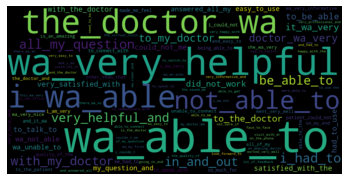

In [9]:
#raw feedback at value_count == 1
wordcloud_build(raw_feedback_1)

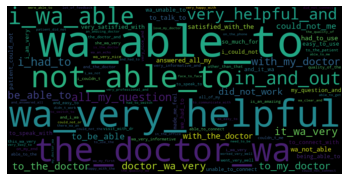

In [10]:
#figure out how to lemmatize better
raw_feedback = ''
for row in fixed_feedback.dropna():
    raw_feedback = raw_feedback + row

wordcloud_build(raw_feedback)

In [11]:
satisfied_feedback = survey_data.query("feedback != 'Enter FeedBack' & is_satisfied == 1")['feedback']

*Trigram wordcloud - satisfied*

In [12]:
satisfied_str = ''
for row in satisfied_feedback.dropna():
    satisfied_str = satisfied_str + row

In [13]:
satisfied_list = pd.Series([row for row in satisfied_feedback.dropna()])
sat_feedback_counts = satisfied_list.value_counts().to_frame().reset_index() \
.rename(columns={0: 'counts', 'index':'feedback'}).query('counts == 1')
sat_feedback_counts

feedback  counts
898                   Very friendly happy with Dr.Fidone       1
899    pretty cool worked nice. audio and video was c...       1
900           Sound quality could be better. Thank you!        1
901    Can't hear very well when on video with doctor/NP       1
902                             Nelson torres is awesome       1
...                                                  ...     ...
18968  Works great. Gets me the face to face that I l...       1
18969            Great! Receptive to questions, thorough       1
18970  It was great. We got to at least see each othe...       1
18971      Very satisfied with the video call was clear.       1
18972       It was my very first time using the service.       1

[18075 rows x 2 columns]

In [14]:
satisfied_top_ten = satisfied_list.value_counts(normalize=True).head(10).to_frame().reset_index()\
.rename(columns={0:'counts', 'index':'feedback'})
satisfied_top_ten

feedback    counts
0       Successful  0.012644
1        excellent  0.008628
2      Successful   0.006535
3               No  0.006066
4       Excellent   0.004058
5            Great  0.003673
6             Good  0.003204
7       Thank you   0.003161
8  Good connection  0.002947
9          perfect  0.002776

In [15]:
satisfied_str_1 = ''
for row in sat_feedback_counts['feedback']:
    satisfied_str_1 = satisfied_str_1 + row

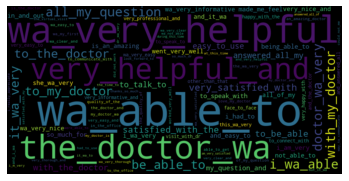

In [16]:
#satisfied feedback at value_count == 1
wordcloud_build(satisfied_str_1)

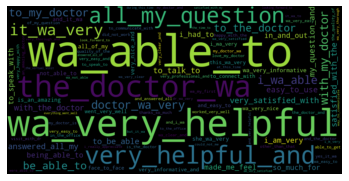

In [17]:
wordcloud_build(satisfied_str)

*Trigram wordcloud - unsatisfied*

In [18]:
unsatisfied_feedback = survey_data.query("feedback != 'Enter FeedBack' & is_satisfied == 0")

In [19]:
unsatisfied_str = ''
for row in unsatisfied_feedback.dropna():
    unsatisfied_str = unsatisfied_str + row

In [20]:
unsatisfied_list = []
for row in unsatisfied_feedback.dropna():
    unsatisfied_list.append(row)
unsatisfied_list = pd.Series(unsatisfied_list)
unsatisfied_list.value_counts()

client_version                  1
feedback                        1
patient_id                      1
build_version                   1
rating                          1
id                              1
updated_on                      1
created_on                      1
screen_size                     1
platform                        1
source                          1
connection_type                 1
is_satisfied                    1
visit_id                        1
member_healthcare_org_rel_id    1
is_mobile                       1
n_minute_duration               1
client_name                     1
dtype: int64

In [21]:
unsatisfied_list = pd.Series([row for row in unsatisfied_feedback.dropna()])
unsat_feedback_counts = unsatisfied_list.value_counts().to_frame().reset_index() \
.rename(columns={0: 'counts', 'index':'feedback'}).query('counts == 1')
unsat_feedback_counts

feedback  counts
0                 client_version       1
1                       feedback       1
2                     patient_id       1
3                  build_version       1
4                         rating       1
5                             id       1
6                     updated_on       1
7                     created_on       1
8                    screen_size       1
9                       platform       1
10                        source       1
11               connection_type       1
12                  is_satisfied       1
13                      visit_id       1
14  member_healthcare_org_rel_id       1
15                     is_mobile       1
16             n_minute_duration       1
17                   client_name       1

In [22]:
unsatisfied_top_ten = unsatisfied_list.value_counts(normalize=True).head(10).to_frame().reset_index()\
.rename(columns={0:'counts', 'index':'feedback'})
unsatisfied_top_ten

feedback    counts
0  client_version  0.055556
1        feedback  0.055556
2      patient_id  0.055556
3   build_version  0.055556
4          rating  0.055556
5              id  0.055556
6      updated_on  0.055556
7      created_on  0.055556
8     screen_size  0.055556
9        platform  0.055556

In [23]:
raw_feedback = survey_data['feedback'].dropna().to_frame().reset_index()\
.rename(columns={'index':'raw_index'})
raw_feedback['audio_issue'] = ''
raw_feedback['video_issue'] = ''
raw_feedback['connection_issue'] = ''
raw_feedback

raw_index                                           feedback  \
0              4                              shut down mid session   
1              6  Brittney is great at what she does for the cit...   
2              7      shut down midway through session again today.   
3             11                                 None at this time.   
4             16  This was a test training run with a new dietit...   
...          ...                                                ...   
38276     161880                                            Great!!   
38277     161889             No great job with this app it's great!   
38278     161893                               Couldn’t hear doctor   
38279     161896                              Dr. Glass is amazing    
38280     161900        Poor audio and visual most of the session.    

      audio_issue video_issue connection_issue  
0                                               
1                                               
2                                               
3                                               
4                                               
...           ...         ...              ...  
38276                                           
38277                                           
38278                                           
38279                                           
38280                                           

[38281 rows x 5 columns]

In [24]:
unsatisfied_feedback = survey_data[survey_data['is_satisfied'] == 0]['feedback']\
.dropna().to_frame().reset_index().rename(columns={'index':'raw_index'})
unsatisfied_feedback

raw_index                                           feedback
0              4                              shut down mid session
1             16  This was a test training run with a new dietit...
2             17                                  video not working
3             18              3rd time kicked off in past 5 minutes
4             32                                        not working
...          ...                                                ...
10334     161781                                  can't see patient
10335     161836                           I can't see the patient 
10336     161860             Call was great. No issues whatsoever. 
10337     161880                                            Great!!
10338     161889             No great job with this app it's great!

[10339 rows x 2 columns]

In [25]:
satisfied_feedback = survey_data[survey_data['is_satisfied'] == 1]['feedback']\
.dropna().to_frame().reset_index().rename(columns={'index':'raw_index'})
satisfied_feedback

raw_index                                           feedback
0              6  Brittney is great at what she does for the cit...
1              7      shut down midway through session again today.
2             11                                 None at this time.
3             25                                         Great call
4             30  This work every well, video and sound was clea...
...          ...                                                ...
27937     161864  I love that now there’s video chat and you can...
27938     161875                                       Thank you.  
27939     161893                               Couldn’t hear doctor
27940     161896                              Dr. Glass is amazing 
27941     161900        Poor audio and visual most of the session. 

[27942 rows x 2 columns]

*unsatisfied trigrams*
(could, see, hear)            68
(patient, could, see)         64
(patient, could, hear)        63
(could, see, patient)         60
(poor, video, quality)        45
(could, hear, patient)        43
(poor, sound, quality)        42
(poor, audio, quality)        41
(see, hear, patient)          38
(video, kept, freezing)       38
(unable, connect, patient)    37
(poor, audio, video)          33
(unable, see, patient)        27
(audio, didnt, work)          25
(patient, couldnt, hear)      25
(couldnt, hear, patient)      22
(patient, unable, connect)    22
(see, patient, video)         22
(patient, unable, see)        21
(sound, quality, poor)        21

*satisfied trigrams*
(everything, went, well)     79
(video, call, great)         77
(call, went, well)           66
(great, video, call)         58
(best, doctor, ever)         54
(satisfied, video, call)     49
(video, call, went)          44
(video, call, good)          41
(visit, went, well)          34
(thank, much, dr)            34
(able, see, doctor)          32
(made, feel, comfortable)    30
(feel, much, better)         30
(video, call, doctor)        28
(went, well, thank)          28
(could, see, hear)           27
(keep, good, work)           25
(video, call, dr)            25
(great, service, thank)      24
(way, see, doctor)           24

In [51]:
uncommon_feedback = unsatisfied_feedback['feedback'].value_counts().to_frame().reset_index().query('feedback').head(1000)

In [52]:
uncommon_words = pd.DataFrame(uncommon_feedback['index'].str.split(' ').tolist()).stack()
uncommon_words.value_counts()

audio           789
no              497
No              411
video           121
Poor            51 
sound           40 
                24 
connection      21 
echo            14 
not             6  
connect         6  
Did             5  
Bad             4  
poor            3  
kept            3  
to              3  
freezing        3  
Echo            2  
Disconnected    2  
froze           2  
and             2  
hear            1  
out             1  
patient,        1  
in              1  
hard            1  
good            1  
Unable          1  
quality         1  
of              1  
excellent       1  
could           1  
Glitched        1  
would           1  
go              1  
Sound           1  
patient         1  
work            1  
dtype: int64

In [58]:
def is_audio_issue(row):
    
    feedback = row['feedback'].lower()
    
    audio = r'echo|sound|aud\w*|hear\w*|microphone|volume|voice|verbal|noise|background'
    
    if bool(re.search(audio, feedback)) == True:
        return 'True'
    else:
        return 'False'

In [59]:
def is_video_issue(row):
    
    feedback = row['feedback'].lower()
    
    video = r'vid\w*|visual|see|monitor|frozen|freez\w*|screen|picture|visibility|camera|fuzzy'
    
    if bool(re.search(video, feedback)) == True:
        return 'True'
    else:
        return 'False'

In [60]:
def is_connection_issue(row):
    
    feedback = row['feedback'].lower()
    
    connection = r'conn\w*|disconn\w*|drop\w*|unable|drop|in and out|slow|forever|phone|had to|lagged|attempt\w*|static|wi-fi|wifi|buffer|nothing|network|bandwidth'
    
    if bool(re.search(connection, feedback)) == True:
        return 'True'
    else:
        return 'False'

In [65]:
def is_product_issue(row):
    
    feedback = row['feedback'].lower()
    
    product = r'dropping|disconn\w*|feed|interface|finished by|delay\w*|break|kick\w*|glitchy|communicate|function\w*|not working|didn\'t work|crashed|system|iOS|schedule|appointment|browsers|features|shut'
    
    if bool(re.search(product, feedback)) == True:
        return 'True'
    else:
        return 'False'

In [66]:
def is_experience_issue(row):
    
    feedback = row['feedback'].lower()
    
    experience = r'Dr\.\s|waiting|hanging up|support|thankful|helpful|doctor|informative|intuitive|pleasant|westmed|efficient|no one|nobody|experience|answer|attitude|personal|professional|smooth|Mr\.\s|Ms\.\s|best|visit|waste'
    
    if bool(re.search(experience, feedback)) == True:
        return 'True'
    else:
        return 'False'

In [67]:
pd.set_option('display.max_colwidth', -1)
unsatisfied_feedback['is_connection_issue'] = unsatisfied_feedback.apply(lambda row: is_connection_issue(row), axis=1)
unsatisfied_feedback['is_video_issue'] = unsatisfied_feedback.apply(lambda row: is_video_issue(row), axis=1)
unsatisfied_feedback['is_audio_issue'] = unsatisfied_feedback.apply(lambda row: is_audio_issue(row), axis=1)
unsatisfied_feedback['is_product_issue'] = unsatisfied_feedback.apply(lambda row: is_product_issue(row), axis=1)
unsatisfied_feedback['is_experience_issue'] = unsatisfied_feedback.apply(lambda row: is_experience_issue(row), axis=1)
unsatisfied_feedback.head(500)

#build a tree diagram on keywords per issue_type -> use value counts to look at most common words per issue_type

raw_index  \
0    4           
1    16          
2    17          
3    18          
4    32          
5    35          
6    57          
7    115         
8    124         
9    201         
10   206         
11   207         
12   221         
13   223         
14   225         
15   233         
16   243         
17   255         
18   267         
19   293         
20   302         
21   311         
22   332         
23   352         
24   364         
25   367         
26   398         
27   403         
28   404         
29   430         
30   443         
31   469         
32   488         
33   551         
34   556         
35   629         
36   637         
37   643         
38   666         
39   674         
40   764         
41   768         
42   815         
43   882         
44   933         
45   937         
46   939         
47   953         
48   971         
49   988         
50   1005        
51   1008        
52   1014        
53   1036        
54   1038        
55   1050        
56   1051        
57   1057        
58   1058        
59   1081        
60   1101        
61   1102        
62   1109        
63   1116        
64   1122        
65   1124        
66   1128        
67   1132        
68   1135        
69   1151        
70   1160        
71   1163        
72   1165        
73   1168        
74   1179        
75   1187        
76   1189        
77   1194        
78   1202        
79   1211        
80   1222        
81   1235        
82   1236        
83   1237        
84   1248        
85   1250        
86   1255        
87   1258        
88   1265        
89   1270        
90   1279        
91   1285        
92   1289        
93   1292        
94   1296        
95   1300        
96   1301        
97   1303        
98   1314        
99   1318        
100  1320        
101  1321        
102  1326        
103  1336        
104  1345        
105  1347        
106  1349        
107  1353        
108  1354        
109  1355        
110  1359        
111  1370        
112  1377        
113  1380        
114  1391        
115  1393        
116  1396        
117  1397        
118  1406        
119  1407        
120  1408        
121  1415        
122  1417        
123  1423        
124  1427        
125  1428        
126  1429        
127  1431        
128  1432        
129  1435        
130  1436        
131  1439        
132  1440        
133  1441        
134  1442        
135  1443        
136  1445        
137  1446        
138  1450        
139  1452        
140  1461        
141  1465        
142  1466        
143  1467        
144  1468        
145  1471        
146  1473        
147  1474        
148  1478        
149  1484        
150  1552        
151  1554        
152  1580        
153  1587        
154  1594        
155  1600        
156  1603        
157  1607        
158  1610        
159  1619        
160  1627        
161  1631        
162  1633        
163  1634        
164  1635        
165  1637        
166  1640        
167  1642        
168  1645        
169  1646        
170  1652        
171  1654        
172  1655        
173  1656        
174  1668        
175  1670        
176  1677        
177  1680        
178  1689        
179  1691        
180  1694        
181  1695        
182  1703        
183  1704        
184  1708        
185  1723        
186  1725        
187  1729        
188  1732        
189  1737        
190  1740        
191  1743        
192  1746        
193  1750        
194  1753        
195  1754        
196  1755        
197  1757        
198  1758        
199  1759        
200  1760        
201  1765        
202  1766        
203  1767        
204  1769        
205  1773        
206  1776        
207  1780        
208  1784        
209  1793        
210  1794        
211  1799        
212  1804        
213  1805        
214  1813        
215  1815        
216  1816        
217  1819        
218  1821        
219  1823        
220  1827        
221  1829

In [68]:
unsatisfied_feedback.query('is_connection_issue.str.contains("False")', engine='python')\
.query('is_video_issue.str.contains("False")', engine='python')\
.query('is_audio_issue.str.contains("False")', engine='python')\
.query('is_product_issue.str.contains("False")', engine='python')\
.query('is_experience_issue.str.contains("False")', engine='python')['feedback'].to_frame()


feedback
1      This was a test training run with a new dietitian and we had a few issues - I will follow up separately via email. Thanks!                                                                                                                                                                              
27     Didn’t work                                                                                                                                                                                                                                                                                             
32     lost call                                                                                                                                                                                                                                                                                               
45     Too choppy                                                                                                                                                                                                                                                                                              
51     disconected                                                                                                                                                                                                                                                                                             
60     Didn’t work again                                                                                                                                                                                                                                                                                       
66     Didn’t work again                                                                                                                                                                                                                                                                                       
77     It’s really bad                                                                                                                                                                                                                                                                                         
89     Lost touch with patient in the middle of the call                                                                                                                                                                                                                                                       
90     doesn't work\n                                                                                                                                                                                                                                                                                          
93     Cuts out for 30 seconds at a time then comes back.\nVery frustrating.                                                                                                                                                                                                                                   
102    Paused after minimizing                                                                                                                                                                                                                                                                                 
110    Cutting out.                                                                                                                                                                                                                                                                                            
124    Call got cut off                

In [119]:
audio_issue_feedback = ''
for row in unsatisfied_feedback.query('is_audio_issue.str.contains("True")', engine='python')['feedback']:
    audio_issue_feedback = audio_issue_feedback + row
    
video_issue_feedback = ''
for row in unsatisfied_feedback.query('is_video_issue.str.contains("True")', engine='python')['feedback']:
    video_issue_feedback = video_issue_feedback + row
    
connection_issue_feedback = ''
for row in unsatisfied_feedback.query('is_connection_issue.str.contains("True")', engine='python')['feedback']:
    connection_issue_feedback = connection_issue_feedback + row
    
product_issue_feedback = ''
for row in unsatisfied_feedback.query('is_product_issue.str.contains("True")', engine='python')['feedback']:
    product_issue_feedback = product_issue_feedback + row
    
experience_issue_feedback = ''
for row in unsatisfied_feedback.query('is_experience_issue.str.contains("True")', engine='python')['feedback']:
    experience_issue_feedback = experience_issue_feedback + row

#generate wordcloud from value counts per issue type
#length of feedback - displot and boxplot
#keyword accuracy - build pie charts for all issue types 
#get counts per issue - bar plot
#bar plot - proportion of issues x # feedback
#length of feedback per issue 

In [120]:
#audio_issue_feedback = ''
#audio_words = pd.DataFrame(unsatisfied_feedback.query('is_audio_issue.str.contains("True")', engine='python')['feedback'].str.split(' ').tolist()).stack()
#for word in audio_words.value_counts().keys():
    #audio_issue_feedback = audio_issue_feedback + word

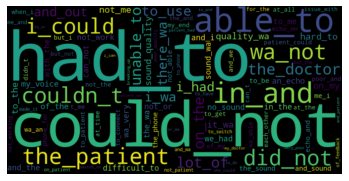

In [121]:
wordcloud_build(audio_issue_feedback)

In [87]:
unsatisfied_feedback.query('is_audio_issue.str.contains("True")', engine='python')['feedback'].value_counts()

Echo                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [133]:
unsatisfied_feedback['is_audio_issue'].value_counts(normalize=True)

False    0.577135
True     0.422865
Name: is_audio_issue, dtype: float64

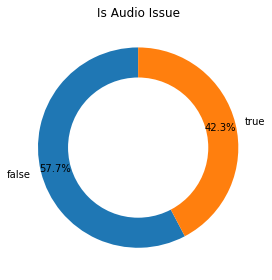

In [136]:
labels = ['false', 'true']
fig1, ax1 = plt.subplots()
ax1.pie(unsatisfied_feedback['is_audio_issue'].value_counts(normalize=True), labels = labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.title("Is Audio Issue")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()



In [ ]:
pies = pd.DataFrame({''})

In [35]:
unsatisfied_str_1 = ''
for row in unsat_feedback_counts['feedback']:
    unsatisfied_str_1 = unsatisfied_str_1 + row

In [95]:
#unsatisfied feedback at value count == 1
wordcloud_build(unsatisfied_str_1)

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [96]:
wordcloud_build(unsatisfied_str)

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [97]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text).lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [98]:
unsatisfied_words = basic_clean(''.join(str(unsatisfied_feedback.query("feedback != 'Enter FeedBack'")['feedback'].dropna().tolist())))
unsatisfied_words[:20]

['shut',
 'mid',
 'session',
 'test',
 'training',
 'run',
 'new',
 'dietitian',
 'issue',
 'follow',
 'separately',
 'via',
 'email',
 'thanks',
 'video',
 'working',
 '3rd',
 'time',
 'kicked',
 'past']

In [99]:
satisfied_words = basic_clean(''.join(str(satisfied_feedback.query("feedback != 'Enter FeedBack'")['feedback'].dropna().tolist())))
satisfied_words[:20]

['brittney',
 'great',
 'city',
 'tampa',
 'helped',
 'health',
 'problem',
 'easy',
 'talk',
 'idea',
 'option',
 'offer',
 'show',
 'really',
 'care',
 'enjoys',
 'working',
 'u',
 'shut',
 'midway']

In [100]:
#3 word occurances - trigrams
unsatisfied_trigram_series = (pd.Series(nltk.ngrams(unsatisfied_words, 3)).value_counts()).head(20)
unsatisfied_trigram_series

(could, see, hear)            68
(patient, could, see)         64
(patient, could, hear)        63
(could, see, patient)         60
(poor, video, quality)        45
(could, hear, patient)        43
(poor, sound, quality)        42
(poor, audio, quality)        41
(see, hear, patient)          38
(video, kept, freezing)       38
(unable, connect, patient)    37
(poor, audio, video)          33
(unable, see, patient)        27
(audio, didnt, work)          25
(patient, couldnt, hear)      25
(see, patient, video)         22
(patient, unable, connect)    22
(couldnt, hear, patient)      22
(patient, unable, see)        21
(sound, quality, poor)        21
dtype: int64

In [101]:
satisfied_trigram_series = (pd.Series(nltk.ngrams(satisfied_words, 3)).value_counts()).head(20)
satisfied_trigram_series

(everything, went, well)     79
(video, call, great)         77
(call, went, well)           66
(great, video, call)         58
(best, doctor, ever)         54
(satisfied, video, call)     49
(video, call, went)          44
(video, call, good)          41
(visit, went, well)          34
(thank, much, dr)            34
(able, see, doctor)          32
(made, feel, comfortable)    30
(feel, much, better)         30
(went, well, thank)          28
(video, call, doctor)        28
(could, see, hear)           27
(video, call, dr)            25
(keep, good, work)           25
(way, see, doctor)           24
(call, worked, well)         24
dtype: int64

In [102]:
#5 grams - unsatisfied
unsatisfied_trigram_series = (pd.Series(nltk.ngrams(unsatisfied_words, 5)).value_counts()).head(500)
unsatisfied_trigram_series

(please, let, u, see, patient)                                   10
(let, u, see, patient, screen)                                   9 
(see, hear, could, see, hear)                                    7 
(would, go, patient, hard, hear)                                 6 
(go, patient, hard, hear, sound)                                 6 
(patient, could, hear, could, hear)                              6 
(sound, would, go, patient, hard)                                6 
(could, see, hear, could, see)                                   5 
(hear, sound, would, go, patient)                                5 
(patient, hard, hear, sound, would)                              5 
(could, hardly, see, patient, using)                             5 
(hardly, see, patient, using, montefiore)                        5 
(see, patient, using, montefiore, first)                         5 
(hard, hear, sound, would, go)                                   5 
(montefiore, first, could, hardly, see)         

Text(0.5, 0, '# of Occurances')

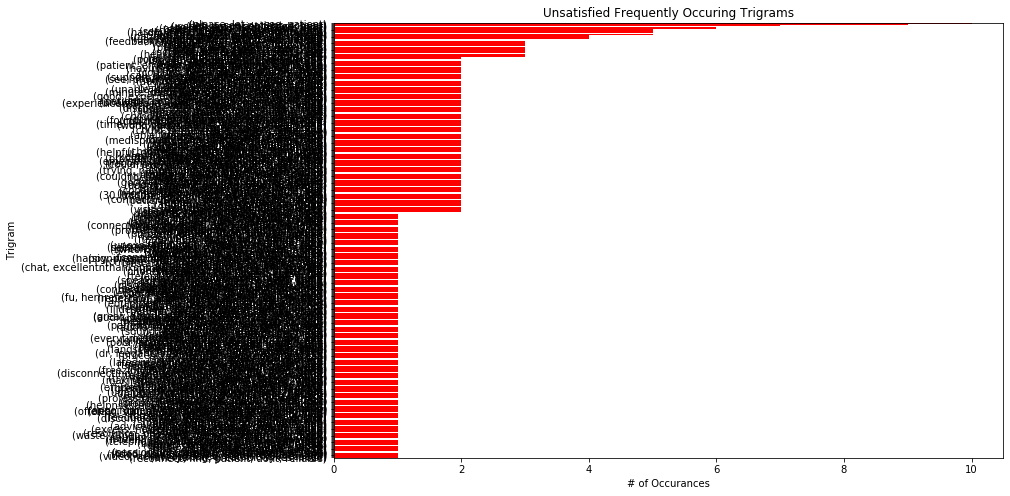

In [103]:
#unsatisfied trigram chart
unsatisfied_trigram_series.sort_values().plot.barh(color='red', width=.8, figsize=(12,8))
plt.title('Unsatisfied Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

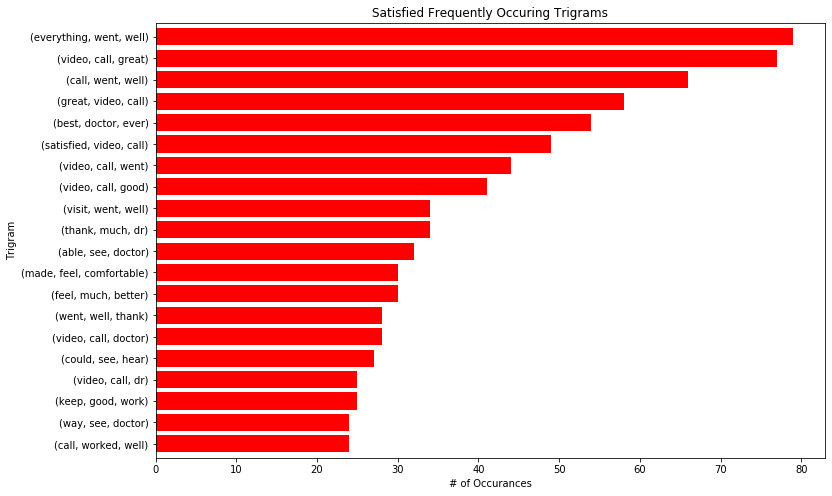

In [104]:
#satisfied trigram chart
satisfied_trigram_series.sort_values().plot.barh(color='red', width=.8, figsize=(12,8))
plt.title('Satisfied Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [105]:
#number of disconnections, join survey_data on visit_id and participant_type
#survey data left join participant visit on survey_data.visit_id = participant_visit.visit_id AND 
#survey_data.participant_type = participant_visit.participant_type
#top 10 satisfied feedback, unsatisfied feedback - percentages of occurences - define categories of issues, row by row write a function that takes in feedback -> output the category of problem

#phase 1 - define functions that will classify feedback text - audio, video, connection issues (product, experience) 
#phase 2 - define methods to classify categories through what the data tells us(N-grams, value_counts)

In [106]:
participant_data = pd.read_csv(r'G:\Shared drives\MediSprout\vishaal\MediSprout-notebooks\NLP Analysis\v2md_v2_1_participant_visit.csv')
participant_data

FileNotFoundError: [Errno 2] File b'G:\\Shared drives\\MediSprout\\vishaal\\MediSprout-notebooks\\NLP Analysis\\v2md_v2_1_participant_visit.csv' does not exist: b'G:\\Shared drives\\MediSprout\\vishaal\\MediSprout-notebooks\\NLP Analysis\\v2md_v2_1_participant_visit.csv'